In [60]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [61]:
# Simple convolution operation

A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[1, 0], [0, 1]])

C = A * B
print(C)
print(torch.sum(C))

tensor([[1, 0],
        [0, 4]])
tensor(5)


In [63]:
# Convolution with stride
def conv2d(A, K):
  a_h, a_w = A.shape
  k_h, k_w = K.shape
  o_h = a_h - k_h + 1
  o_w = a_w - k_w +1

  out = torch.zeros((o_h, o_w))

  for i in range(o_h):
    for j in range(o_w):
      c = A[i:i+k_h, j:j + k_w] * K
      out[i, j] = torch.sum(c)
  return out


a = torch.ones((4, 4))
k = torch.ones((2,2))
print(conv2d(a, k))


tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])


In [74]:
import torch
import torch.nn.functional as F

# convolution with stride and padding
# why do i need padding - to preserve information at the border
# 2) to keep spatial dimention
def conv2d(A, K, stride=1, padding=1):
    # Pad the input tensor
    A = F.pad(A, (padding, padding, padding, padding))

    a_h, a_w = A.shape
    k_h, k_w = K.shape

    o_h = (a_h - k_h) // stride + 1
    o_w = (a_w - k_w) // stride + 1

    out = torch.zeros((o_h, o_w))

    for i in range(0, o_h, stride):
        for j in range(0, o_w, stride):
            c = A[i: i + k_h, j: j + k_w] * K
            out[i, j] = torch.sum(c)

    return out

a = torch.ones((5, 5))
k = torch.ones((3, 3))

print(conv2d(a, k, stride=2, padding=2))


tensor([[1., 0., 3., 0.],
        [0., 0., 0., 0.],
        [3., 0., 9., 0.],
        [0., 0., 0., 0.]])


In [75]:
# Create a 2D convolution layer
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1, padding=2)

# Manually set the weights and bias of the convolution layer
conv.weight.data = torch.Tensor([[[[1, 2], [3, 4]]]])
conv.bias.data.fill_(0)

# Create a 3x3 input with a batch size of 1
input = torch.Tensor([[[[1, 1, 1], [1, 1, 1], [1, 1, 1]]]])
output = conv(input)

print(output)

tensor([[[[ 0.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  4.,  7.,  7.,  3.,  0.],
          [ 0.,  6., 10., 10.,  4.,  0.],
          [ 0.,  6., 10., 10.,  4.,  0.],
          [ 0.,  2.,  3.,  3.,  1.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)


In [ ]:
# step1: Define the architecture
# conv = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)



class Conv2d(nn.Module):
  def __init__(self, in_channles, out_channels=1, kernel_size=3, stride=1, padding=0 ):
    self.k = torch.randn((kernel_size, kernel_size))


  def __call__(self, x):
    self.forward(x)

  def forward(self, x):
    # create feature map for with each filter by applying convolution
    return x


In [ ]:
class LearnCNN(nn.Module):
  def __init__(self, batch_size, filters=1, kernel_size=3, stride=1, padding=0)

In [32]:
from torch.utils import data
# step2: Data preparation - MNIST
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

# Download dataset
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

full_data = datasets.MNIST('./data', download=True, transform=transform)

# Proprocess dataset
train_size = int(len(full_data) * 0.7)
test_size = int(len(full_data) * 0.2)
val_size = int(len(full_data) * 0.1)

# Split dataset
train_set, test_set, val_set = random_split(full_data, [train_size, test_size, val_size])
print(len(train_set), len(test_set), len(val_set))


42000 12000 6000


In [33]:
# Create DataLoaders for each dataset
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
valid_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

In [34]:
for images, labels in train_loader:
    print(images.shape, labels.shape)
    break


torch.Size([32, 1, 28, 28]) torch.Size([32])


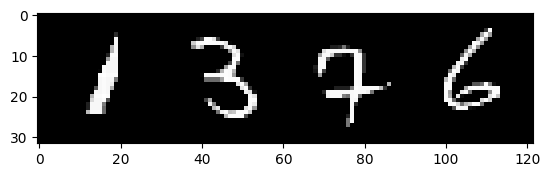

In [39]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Move the images to cpu
generated_images = images[:4]

# Create a grid of images and convert it to numpy
grid = torchvision.utils.make_grid(generated_images, nrow=8)
npimg = grid.numpy()

# Plot the grid of images
# Plot the images
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

In [40]:
# Step3: Training

# hyper parameters

batch_size = 32
channels = 3
width = 64
height = 64


conv = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)

# training loop
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.adam(conv.parameters())
n_epochs = 10
for epoch in range(n_epochs):
  for batch in train_loader:
    y_preds = nn.conv2d(batch)
    # why ? loss -negative log likely hood
    # logits
    y_preds = F.softmax(y_preds)
    # loss calculation
    loss = loss_func(y_preds, y)
    # zero the gradients
    optimizer.zero_grad()
    # calculate graidents
    loss.backward()
    # update weights
    optimizer.step()
    # Print the loss for this epoch
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

AttributeError: ignored